# 案例1：交通流量数据分析

## 手工解读数据

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
with open("./Fremont_Bridge_Bicycle_Counter.csv", "r") as file:
    lines = file.readlines()

In [4]:
def parse_line(line):
    line = line[:-1]
    items = line.split(",")
    dt, total, east, west = items
    total = int(total)
    east = int(east)
    west = int(west)
    dt = datetime.strptime(dt, "%m/%d/%Y %H:%M:%S %p")

    return dt, total, east, west

In [5]:
#dt = datetime.strptime("21/11/06 16:30:32 AM", "%d/%m/%y %H:%M:%S %p")
#dt = datetime.strptime("08/01/2022 12:00:00 AM", "%m/%d/%Y %H:%M:%S %p")
#dt

In [6]:
dataframe = []

for idx, line in enumerate(lines[1:]):
    try:
        items = parse_line(line)
    except:
        continue
    dataframe.append(items)

dataframe = np.array(dataframe)
dataframe

array([[datetime.datetime(2022, 8, 1, 12, 0), 23, 7, 16],
       [datetime.datetime(2022, 8, 1, 1, 0), 12, 5, 7],
       [datetime.datetime(2022, 8, 1, 2, 0), 3, 0, 3],
       ...,
       [datetime.datetime(2022, 7, 31, 9, 0), 75, 46, 29],
       [datetime.datetime(2022, 7, 31, 10, 0), 35, 18, 17],
       [datetime.datetime(2022, 7, 31, 11, 0), 28, 7, 21]], dtype=object)

In [7]:
(dataframe[:, 1] == dataframe[:, 2] + dataframe[:, 3]).all()

True

## 用Pandas导入数据

In [8]:
import pandas as pd

In [9]:
df = pd.read_csv("./Fremont_Bridge_Bicycle_Counter.csv", index_col="Date", parse_dates=True)

In [10]:
df.columns = ["Total", "East", "West"]

In [11]:
df.sort_index(inplace=True)

In [12]:
df

,Total,East,West
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0
...,...,...,...
2023-02-28 19:00:00,59.0,19.0,40.0
2023-02-28 20:00:00,37.0,22.0,15.0
2023-02-28 21:00:00,30.0,13.0,17.0


## 数据分析1：可视化

<Axes: xlabel='Date'>

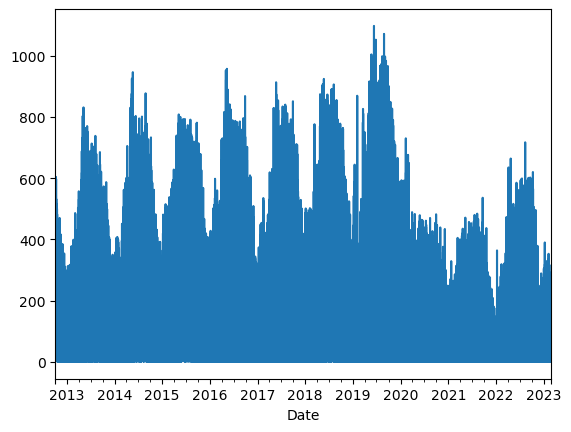

In [13]:
df["Total"].plot()

<Axes: xlabel='Date'>

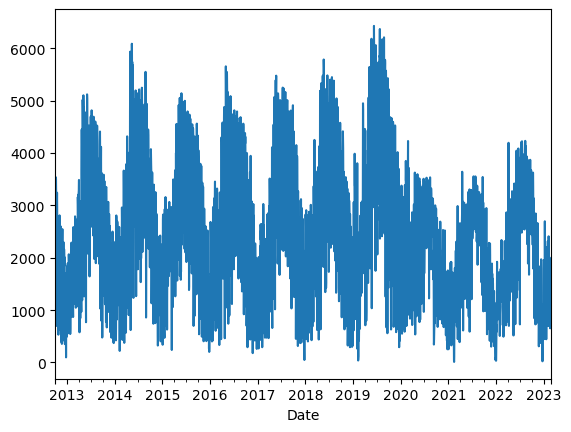

In [14]:
df["Total"].resample("D").sum().plot()

<Axes: xlabel='Date'>

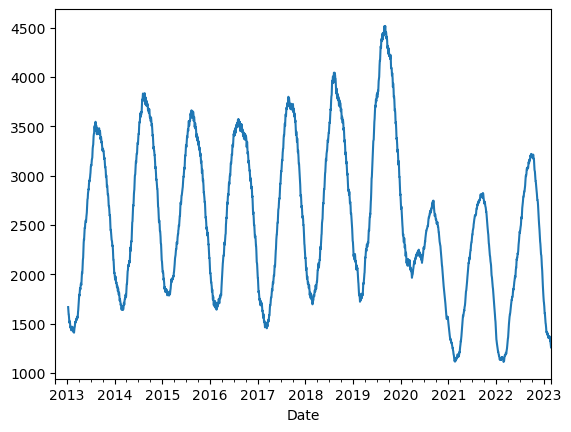

In [15]:
df["Total"].resample("D").sum().rolling(100).mean().plot()

In [16]:
df_per_day = df.resample("D").sum()
df_per_day

,Total,East,West
Date,,,
2012-10-03,3521.0,1760.0,1761.0
2012-10-04,3475.0,1708.0,1767.0
2012-10-05,3148.0,1558.0,1590.0
2012-10-06,2006.0,1080.0,926.0
2012-10-07,2142.0,1191.0,951.0
...,...,...,...
2023-02-24,1153.0,425.0,728.0
2023-02-25,856.0,373.0,483.0
2023-02-26,896.0,370.0,526.0


In [17]:
df_per_day["DayOfWeek"] = df_per_day.index.day_of_week

In [18]:
df

,Total,East,West
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0
...,...,...,...
2023-02-28 19:00:00,59.0,19.0,40.0
2023-02-28 20:00:00,37.0,22.0,15.0
2023-02-28 21:00:00,30.0,13.0,17.0


In [19]:
daily_variations = df.pivot_table("Total", index=df.index.date, columns=df.index.hour)
daily_variations

Date,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
2012-10-03,13.0,10.0,2.0,5.0,7.0,31.0,155.0,352.0,437.0,276.0,...,128.0,164.0,315.0,583.0,380.0,128.0,80.0,63.0,49.0,17.0
2012-10-04,18.0,3.0,9.0,3.0,8.0,26.0,142.0,319.0,418.0,241.0,...,119.0,147.0,275.0,507.0,378.0,164.0,83.0,70.0,46.0,41.0
2012-10-05,11.0,8.0,7.0,4.0,9.0,25.0,105.0,319.0,370.0,212.0,...,125.0,164.0,310.0,434.0,316.0,115.0,68.0,42.0,36.0,32.0
2012-10-06,15.0,15.0,9.0,3.0,5.0,5.0,27.0,33.0,105.0,114.0,...,203.0,211.0,183.0,180.0,96.0,78.0,43.0,33.0,34.0,34.0
2012-10-07,11.0,17.0,3.0,6.0,3.0,9.0,17.0,26.0,69.0,103.0,...,241.0,231.0,225.0,191.0,113.0,49.0,55.0,47.0,18.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-24,5.0,3.0,1.0,0.0,2.0,8.0,18.0,68.0,96.0,76.0,...,66.0,111.0,144.0,141.0,91.0,40.0,24.0,28.0,18.0,15.0
2023-02-25,7.0,6.0,1.0,1.0,1.0,1.0,7.0,14.0,35.0,45.0,...,101.0,107.0,90.0,61.0,36.0,26.0,13.0,29.0,15.0,8.0
2023-02-26,5.0,1.0,1.0,2.0,3.0,1.0,6.0,30.0,48.0,23.0,...,127.0,117.0,106.0,77.0,49.0,31.0,19.0,9.0,9.0,1.0
2023-02-27,3.0,3.0,0.0,2.0,5.0,12.0,45.0,118.0,177.0,98.0,...,41.0,67.0,120.0,200.0,85.0,50.0,26.0,15.0,11.0,5.0


<Axes: xlabel='Date'>

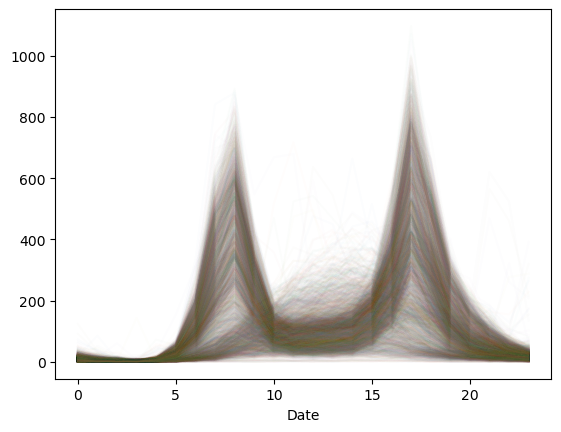

In [20]:
daily_variations.T.plot(legend=False, alpha=0.01)

In [53]:
daily_variations.index = pd.to_datetime(daily_variations.index)

<Axes: xlabel='Date'>

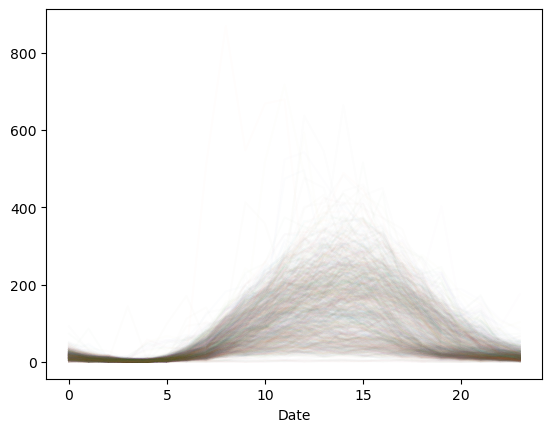

In [77]:
is_weekend = daily_variations.index.dayofweek > 4
daily_variations[is_weekend].T.plot(legend=False, alpha=0.01)

In [68]:
X = daily_variations.fillna(0).values

In [70]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)
X2 = pca.transform(X)

In [74]:
X2

array([[ 378.6599244 ,  -37.63772682],
       [ 300.98064904,    3.43720127],
       [ 200.11204942,    9.93335514],
       ...,
       [-497.20260594,  -46.6519682 ],
       [-292.12908772, -178.46257804],
       [-190.77629581, -135.93513122]])

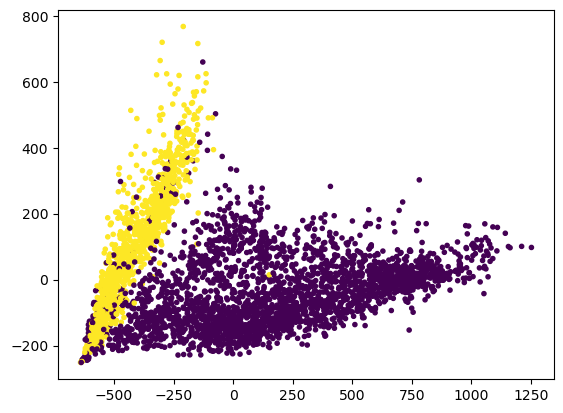

In [78]:
import matplotlib.pyplot as plt

plt.scatter(X2.T[0], X2.T[1], marker=".", c=is_weekend)

In [22]:
first_day_of_week = df_per_day.index - df_per_day.index.dayofweek * np.timedelta64(1, "D")

In [23]:
weekly_variation = df_per_day.pivot_table("Total", index=first_day_of_week, columns=df_per_day.index.dayofweek)

<Axes: xlabel='Date'>

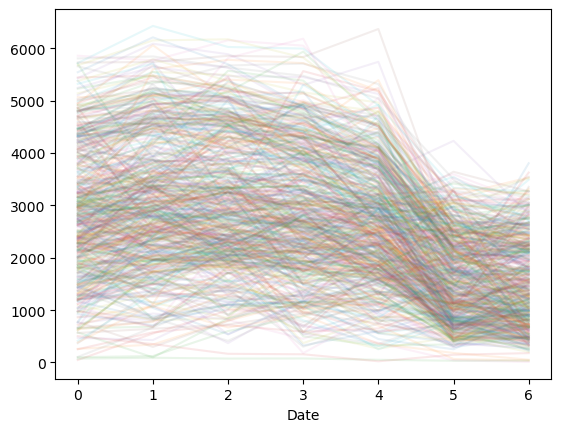

In [24]:
weekly_variation.T.plot(legend=False, alpha=0.1)

## 基于PyTorch建模

In [25]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import MinMaxScaler

### 提取日期等信息作为自变量

In [26]:
df["hour"] = df.index.hour
df["dayofweek"] = df.index.dayofweek
df["month"] = df.index.month
df["dayofyear"] = df.index.dayofyear

### 自变量、因变量归一化

In [27]:
sc = MinMaxScaler()
label_sc = MinMaxScaler()

In [28]:
df

,Total,East,West,hour,dayofweek,month,dayofyear
Date,,,,,,,
2012-10-03 00:00:00,13.0,4.0,9.0,0,2,10,277
2012-10-03 01:00:00,10.0,4.0,6.0,1,2,10,277
2012-10-03 02:00:00,2.0,1.0,1.0,2,2,10,277
2012-10-03 03:00:00,5.0,2.0,3.0,3,2,10,277
2012-10-03 04:00:00,7.0,6.0,1.0,4,2,10,277
...,...,...,...,...,...,...,...
2023-02-28 19:00:00,59.0,19.0,40.0,19,1,2,59
2023-02-28 20:00:00,37.0,22.0,15.0,20,1,2,59
2023-02-28 21:00:00,30.0,13.0,17.0,21,1,2,59


In [29]:
data = df.values[:, [True, False, False, True, True, True, True]]

In [30]:
data = sc.fit_transform(data)

In [31]:
data

array([[0.0118505 , 0.        , 0.33333333, 0.81818182, 0.75616438],
       [0.00911577, 0.04347826, 0.33333333, 0.81818182, 0.75616438],
       [0.00182315, 0.08695652, 0.33333333, 0.81818182, 0.75616438],
       ...,
       [0.02734731, 0.91304348, 0.16666667, 0.09090909, 0.15890411],
       [0.01276208, 0.95652174, 0.16666667, 0.09090909, 0.15890411],
       [0.00546946, 1.        , 0.16666667, 0.09090909, 0.15890411]])

### 重新组织数据

In [32]:
lookback = 90

In [33]:
labels = data[lookback:,0].reshape(-1, 1)
labels

array([[0.08751139],
       [0.07110301],
       [0.03919781],
       ...,
       [0.02734731],
       [0.01276208],
       [0.00546946]])

In [34]:
inputs = np.zeros((len(data)-lookback,lookback,data.shape[1]))

In [35]:
for i in range(lookback, len(data)):
    inputs[i-lookback] = data[i-lookback:i]
inputs[3]

array([[0.00455789, 0.13043478, 0.33333333, 0.81818182, 0.75616438],
       [0.00638104, 0.17391304, 0.33333333, 0.81818182, 0.75616438],
       [0.02825889, 0.2173913 , 0.33333333, 0.81818182, 0.75616438],
       [0.14129444, 0.26086957, 0.33333333, 0.81818182, 0.75616438],
       [0.32087511, 0.30434783, 0.33333333, 0.81818182, 0.75616438],
       [0.39835916, 0.34782609, 0.33333333, 0.81818182, 0.75616438],
       [0.25159526, 0.39130435, 0.33333333, 0.81818182, 0.75616438],
       [0.10756609, 0.43478261, 0.33333333, 0.81818182, 0.75616438],
       [0.03828624, 0.47826087, 0.33333333, 0.81818182, 0.75616438],
       [0.06927985, 0.52173913, 0.33333333, 0.81818182, 0.75616438],
       [0.08204193, 0.56521739, 0.33333333, 0.81818182, 0.75616438],
       [0.11668186, 0.60869565, 0.33333333, 0.81818182, 0.75616438],
       [0.14949863, 0.65217391, 0.33333333, 0.81818182, 0.75616438],
       [0.28714676, 0.69565217, 0.33333333, 0.81818182, 0.75616438],
       [0.53144941, 0.73913043, 0.

### 划分训练集和测试集

In [36]:
test_portion = int(0.1*len(inputs))
test_portion

9113

In [37]:
train_x = inputs[:-test_portion]
train_y = labels[:-test_portion]

In [38]:
test_x = inputs[-test_portion:]
test_y = inputs[-test_portion:]

### 构建PyTorch模型
#### 设置数据读取规则

In [39]:
batch_size = 256
train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size, drop_last=True)

In [40]:
device = torch.device("cpu")

In [41]:
class GRUNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.2):
        super(GRUNet, self).__init__()
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers
        
        self.gru = nn.GRU(input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()
        
    def forward(self, x, h):
        out, h = self.gru(x, h)
        out = self.fc(self.relu(out[:,-1]))
        return out, h
    
    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        hidden = weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device)
        return hidden

In [42]:
import time

def train(train_loader, learn_rate, hidden_dim=256, EPOCHS=5):
    model_type = "GRU"
    # Setting common hyperparameters
    input_dim = next(iter(train_loader))[0].shape[2]
    output_dim = 1
    n_layers = 2
    
    # Instantiating the models
    model = GRUNet(input_dim, hidden_dim, output_dim, n_layers)
    model.to(device)
    
    # Defining loss function and optimizer
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learn_rate)
    
    model.train()
    print("Starting Training of {} model".format(model_type))
    epoch_times = []
    # Start training loop
    for epoch in range(1,EPOCHS+1):
        start_time = time.time()
        h = model.init_hidden(batch_size)
        avg_loss = 0.
        counter = 0
        for x, label in train_loader:
            counter += 1
            h = h.data
            model.zero_grad()
            
            out, h = model(x.to(device).float(), h)
            loss = criterion(out, label.to(device).float())
            loss.backward()
            optimizer.step()
            avg_loss += loss.item()
            #if counter%200 == 0:
            print("Epoch {}......Step: {}/{}....... Average Loss for Epoch: {}".format(epoch, counter, len(train_loader), avg_loss/counter))
        current_time = time.time()
        print("Epoch {}/{} Done, Total Loss: {}".format(epoch, EPOCHS, avg_loss/len(train_loader)))
        print("Total Time Elapsed: {} seconds".format(str(current_time-start_time)))
        epoch_times.append(current_time-start_time)
    print("Total Training Time: {} seconds".format(str(sum(epoch_times))))
    return model

In [43]:
lr = 0.001
#gru_model = train(train_loader, lr)